<a href="https://colab.research.google.com/github/NierodkaGrow/Python_new/blob/main/04_machine_learning/Sklearn_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 5.A. REGRESJA - METODY OCENY MODELU

MODEL REGRESYJNY - CEL: przewidzenie ciągłej wartosci zmiennej np. przyszłych naszych klientów

Import bibliotek

In [55]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

Generowanie danych do pracy (oczekiwana wartość 100, odchylenie 20) - dane prawdziwe

In [56]:
y_true = 100 + 20 * np.random.randn(50)
y_true

array([137.259033,  60.32727 , 123.133779, 112.185645,  93.535975,
       113.282912, 107.93452 ,  88.477663, 129.764368, 102.804937,
       123.766335,  95.085092,  67.288268, 104.895962,  95.298355,
        74.783444,  66.160641, 112.329018, 125.393826, 127.94676 ,
       110.684499, 100.082041, 103.788397, 100.895494, 115.893705,
        90.137185,  74.768205,  95.614795, 103.945444,  94.894391,
       100.516152, 144.019329, 117.687352,  72.263549, 113.073246,
        56.467827, 112.378978, 109.544686, 100.521931,  80.605887,
        80.325438, 108.250654,  87.713903, 116.741636,  87.52762 ,
        92.736276, 115.189427,  99.32146 ,  96.671986, 105.391448])

Dodanie też szumu do danych. Porównaj te i powyższe dane

In [57]:
y_pred = y_true + 10 * np.random.randn(50)
y_pred

array([141.012089,  59.488118, 125.395042, 111.026838,  97.651999,
       116.161016, 112.977235,  96.520336, 119.458286,  89.227962,
       121.101316,  93.372164,  71.912123,  92.697406,  97.224084,
        79.137948,  49.8112  , 116.678391, 139.372019, 129.193427,
       101.769985,  94.313107, 103.038908,  95.677729,  83.849692,
       104.764295,  70.099179,  93.824598, 113.192921,  97.246839,
        95.630069, 143.089513, 123.041366,  77.771996, 111.158026,
        64.414804, 120.229943, 104.667442,  90.463282,  83.88164 ,
        86.115922, 103.651399,  83.355744, 122.104321,  89.09777 ,
       106.324167, 120.342879, 123.162706, 101.963889,  96.43001 ])

Jaka wartość była w rzeczywistości a jaka nasz model przewidział

In [58]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results.head()

,y_true,y_pred
0,137.259033,141.012089
1,60.327270,59.488118
2,123.133779,125.395042
3,112.185645,111.026838
4,93.535975,97.651999


Badanie błędu  - różnicy wartości prawdziwej i przewidzanej

ANALIZA WYNIKU: Jeśli wartość błedu > 0 to występuje niedoszacowanie danych. Jeśli wartość błędu < 0 to zachodzi przeszacowanie wyniku

In [59]:
results['error'] = results['y_true'] - results['y_pred']
results.head()

,y_true,y_pred,error
0,137.259033,141.012089,-3.753056
1,60.327270,59.488118,0.839152
2,123.133779,125.395042,-2.261263
3,112.185645,111.026838,1.158807
4,93.535975,97.651999,-4.116024


INTERPRETACJA GRAFICZNA

Ujmujesz wartości maksymalne i minimalne aby narysować linię

INTERPRETACJA WYKRESU: na osi x - wartosci prawdziwe, na osi y przewidziane przez model. Odległość punktów leżacych od prostej określa wartość błędu.

In [60]:
def plot_regression_results(y_true, y_pred): 
    results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    min = results[['y_true', 'y_pred']].min().min()
    max = results[['y_true', 'y_pred']].max().max()

    fig = go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                    go.Scatter(x=[min, max], y=[min, max])],
                    layout=go.Layout(showlegend=False, width=800, height=500,
                                     xaxis_title='y_true', 
                                     yaxis_title='y_pred',
                                     title='Regression results'))
    fig.show()
plot_regression_results(y_true, y_pred)

Dodanie kolejnych danych (1000 elementów) i zbadanie rozkładuy naszych błędów - historram zmiennej  (powstaje przez odjęcie wartości prawdziwych i predykcji)

INTERPRETACJA GRAFIKI: Więcej wartości po prawej stronie - bład dodatni, model nie doszacowuje; wwięcej wartości po lewej... przeszacowuje. Optymalne rozwiazanie - rozkład symetryczny i blisko zera

In [61]:
y_true = 100 + 20 * np.random.randn(1000)
y_pred = y_true + 10 * np.random.randn(1000)
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results['error'] = results['y_true'] - results['y_pred']

px.histogram(results, x='error', nbins=50, width=800)

### <a name='a3'></a> A. Mean Absolute Error - Średni błąd bezwzględny
### $$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_{true} - y_{pred}|$$

In [62]:
def mean_absolute_error(y_true, y_pred):
    return abs(y_true - y_pred).sum() / len(y_true)

mean_absolute_error(y_true, y_pred)

7.858384613181288

Ten sam wynik - mozna skorzystać zamiast z powyższego wzoru, to z metryki będącej w bibliotece sklearn

In [63]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

7.858384613181288

### <a name='a4'></a> B. Mean Squared Error - MSE - Błąd średniokwadratowy
### $$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{true} - y_{pred})^{2}$$

In [64]:
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum() / len(y_true)

mean_squared_error(y_true, y_pred)

96.4566885898502

In [65]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)

96.4566885898502

### <a name='a5'></a> C. Root Mean Squared Error - RMSE - Pierwiastek błędu średniokwadratowego
### $$RMSE = \sqrt{MSE}$$

Jak średnio nasze predykcje odbiegają od wartości prawdziwych chocby 9.8 zł

In [66]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).sum() / len(y_true))

root_mean_squared_error(y_true, y_pred)

9.821236612048923

In [67]:
np.sqrt(mean_squared_error(y_true, y_pred))

9.821236612048923

### <a name='a6'></a>  D. Max Error - Błąd maksymalny

$$ME = max(|y\_true - y\_pred|)$$ 

Często potrzebny jest model, który maksymalnie popłni bąd na danym poziomie. Czyli maksymalny bład jest nieco ponad: 'Tu wpisz wynik"

In [68]:
def max_error(y_true, y_pred):
    return abs(y_true - y_pred).max()

In [69]:
max_error(y_true, y_pred)

36.0916070746341

In [70]:
from sklearn.metrics import max_error

max_error(y_true, y_pred)

36.0916070746341

### <a name='a7'></a>  E. R2 score - współczynnik determinacji
### $$R2\_score = 1 - \frac{\sum_{i=1}^{N}(y_{true} - y_{pred})^{2}}{\sum_{i=1}^{N}(y_{true} - \overline{y_{true}})^{2}}$$

Cel - aby metryka była jak najbliżej 1

In [71]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.7370247392923767

In [107]:
def r2_score(y_true, y_pred):
    numerator = ((y_true - y_pred) ** 2).sum()
    denominator = ((y_true - y_true.mean()) ** 2).sum()
    try:
        r2 = 1 - numerator / denominator
    except ZeroDivisionError:
        print('Dzielenie przez zero')
    return r2

Choć powyższa funkcja moze obliczyć błąd, to prosciej go obliczyć korzystając z metryki będącej w bibliotece sklearn

In [73]:
r2_score(y_true, y_pred)

0.7370247392923767

### 5.B. REGRESJA: Model regresji liniowej cz. 1

In [74]:
import sklearn
sklearn.__version__

'0.22.2.post1'

Regresja Liniowa - wprowadzenie

Zdefiniujmy:
- $X_1, X_2, ..., X_n$ - zmienne niezależne (nasze dane do modelu)
- $Y$ - zmienna docelowa
- $y_{true}$ - wartość rzeczywista
- $y_{pred}$ - wartość przewidziana przez model
- $w_0, w_1,...,w_n$ - wagi do modelu (podlegaja uczeniu)

W tym modelu zakłada się. ze wartość przewidywana $y_{pred}$ może być liniową kombinacją zmiennych niezależnych. Ogólna postac modelu:

>  $$y_{pred}(W, X) = w_0 + w_1X_1 + ... + w_nX_n$$
>  $$Y = XW$$

gdzie:
>  $X = \begin{pmatrix} 1 & X_1 & X_2 & \dots & X_n\end{pmatrix}$,  $W = \begin{pmatrix} w_{0} \\  w_{1}  \\ \dots \\ w_{n}\end{pmatrix}$

Wprowadźmy oznaczenia:
- $w = (w_1,...w_n)$ jako `coef_`
- $w_0$ jako `intercept_`

Regresja Liniowa polega na takim dopasowaniu wag $w_0, w_1,...,w_n$ by zminimalizować funkcję kosztu(cost function):
>$$||XW-Y||_{2}^{2} \rightarrow min$$  

Przykład w $R^2$:  
$Y=w_0 + w_1X_1$

Przykład w $R^3$:  
$Y=w_0 + w_1X_1 + w_2X_2$

Podstawowe założenia regresji liniowej

* mamy zależność liniową
* wariancja reszt jest taka sama dla wszystkich obserwacji
* brak współliniowości (żaden z predyktorów nie stanowi kombinacji liniowej innych predyktorów)

### <a name='a2'></a> Wygenerowanie danych

Przykład w $R^2$:  
$Y=w_0 + w_1X_1$

Mamy 100 próbek i 1 zmienną

In [75]:
import numpy as np
np.random.seed(10)

X = np.arange(0, 50, 0.5)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1, 1)

print('Rozmiar X:',X.shape)
print('Rozmiar y:', y.shape)

Rozmiar X: (100, 1)
Rozmiar y: (100,)


###Podział danych na zbiór treningowy i testowy

25 próbek idzie do zbioru testowego, a 75 do treningowego

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train_shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape: (75, 1)
X_test shape: (25, 1)
y_train_shape (75,)
y_test shape (25,)


### Wizualizacja

Funkcja podzieliła dane na dwa zbiory. Trenujemy model na zbiorze treningowym, a oceniamy na zbiorze - danych - testowym.

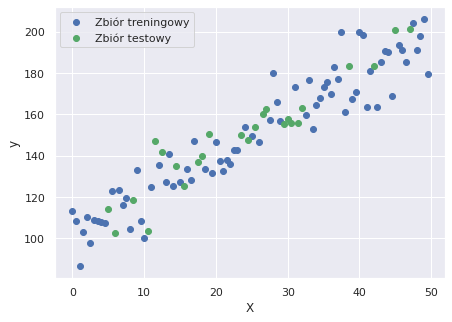

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

### 5.C. REGRESJA: Model regresji liniowej cz. 2.

coef_ wartosci naszych wag; intercept_ to wartosć  wyrazu wolnego - u nas przecięcia z osią y

In [78]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[1.934383]
101.86187237393071


Na podstawie danych wyjściowych przewidywanie wyniku
Rozwiązaniem jest prosta o postaci:

$Y=101.86 + 1.93\cdot X_1$   
### <a name='a6'></a>  Wizualizacja zbioru treningowego i dopasowanego modelu

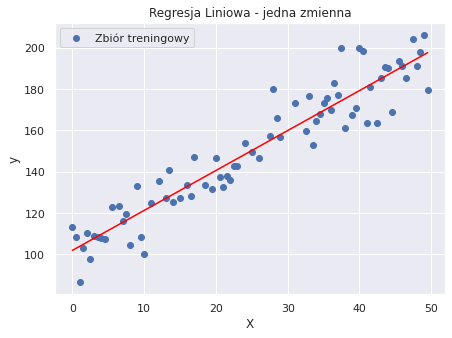

In [79]:
plt.figure(figsize=(7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

### Wizualizacja zbioru testowego i dopasowanego modelu

Jak model działa na danych których nie widział, czyli danych testowych

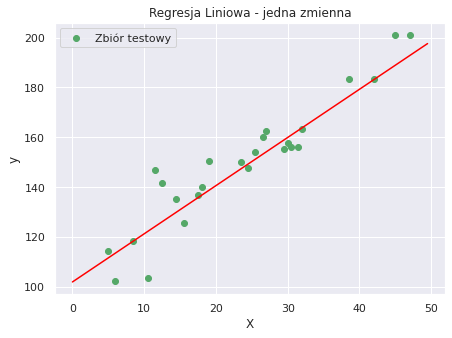

In [80]:
y_pred = lin_reg.predict(X_test)
plt.figure(figsize=(7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

### <a name='a8'></a> Ocena modelu
Metoda `score()` zwraca współczynnik determinacji $R^2$  naszej predykcji.

Współczynnik determinacji jest zdefiniowany jako:

### $R^{2} =1 - \frac{\sum_{t=1}^{n}(y_{pred, t} - \bar{y}_{true} )^2}{\sum_{t=1}^{n}(y_{true, t} - \bar{y}_{true} )^2}$

Współczynnik determinacji jest miarą stopnia dopasowania modelu do próby. Dopasowanie modelu jest tym lepsze im wartość $R^2$ jest bliżej 1.

In [81]:
lin_reg.score(X_test, y_test)

0.8773651467468433

In [82]:
lin_reg.score?

### Przykład złego zastosowania regresji liniowej

Dane nie maja charakteru liniowego i model się nie sprawdza

[-0.976747]
22.30309977402894


Text(0, 0.5, 'y')

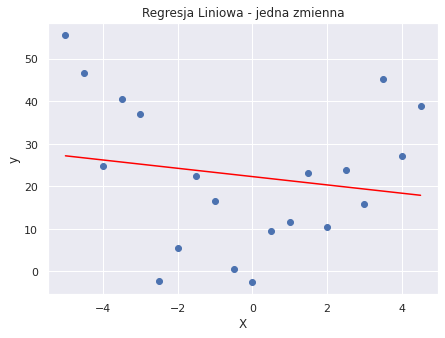

In [83]:
X = np.arange(-5, 5, 0.5)
noise = 10 * np.random.randn(20)
y = 2 * (X ** 2) + 4 + noise
X = X.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.coef_)
print(lin_reg.intercept_)

plt.figure(figsize=(7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

### 5. D. REGRESJA WIELOMIANOWA

### <a name='a1'></a> Polynomial Regression - Regresja Wielomianowa
Powszechnym wzorcem stosowanym w uczeniu maszynowym jest użycie modeli liniowych wytrenowanych na nieliniowych funkcjach danych. Podejscie to utrzymuje szybkie działanie metod liniowych i zarazem umożliwia stosowanie metod liniowych dla znacznie szerszego zakresu danych.

Przykładowo, prosta regresja liniowa może zostać zastosowana przez skonstruowanie cech wielomianowych do modelów nieliniowych.

Rozważmy model regresji liniowej  z użyciem wag (wagi zostaną poddane trenowaniu):
$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$
Dodając cechy wileomianowe otrzymujemy:
$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$
Wyobraźmy sobie teraz nastepujące podstawienie:
$$z = [1, x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$
Wrzucając to z powrotem do naszego modelu dotrzymujemy prosty model liniowy:
$$\hat{y}(w, z) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

To implikuje fakt, iż nasz model regresji wielomianowej znajduje się w klasie modeli liniowych i może być rozwiązany za pomocą tych samych technik. 

### Rozważmy model regresji liniowej: $\hat{y}(w,x)=w_0+w_1x_1$

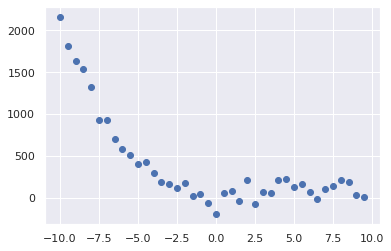

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

np.random.seed(0)
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40, 1)
_ = plt.scatter(X, y)

Trenowanie na wszystkich danych 

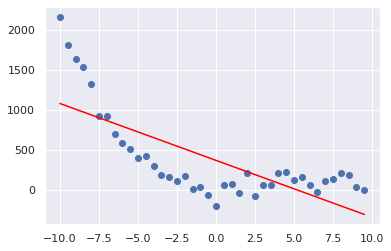

In [85]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c='red')

Metryka r2_score

In [86]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.5398062344255777

Model jest niedouczony (underfitting). Potrzebujemy zwiekszyć złozoność modelu do naszego problemu.

Rozważmy model regresji liniowej:
$$\hat{y}(w, x) = w_0 + w_1 x_1$$
Dodając cechy wielomianowe otrzymujemy:
$$\hat{y}(w, x) = w_0 + w_1 x_1 +w_2x_1^2 $$
Wyobraźmy sobie teraz nastepujące podstawienie:
$$z = [1, x_1, x_1^2]$$
Wrzucając to z powrotem do naszego modelu otrzymujemy prosty model liniowy:
$$\hat{y}(w, z) = w_0 + w_1 z_1 + w_2 z_2$$

### Ekstrakcja cech wielomianowych - stopień 2

WYNIK: w pierwszej kolumnie nasza stała, w drugiej wartość zmiennej $$ x_1$$; w trzeciej podnosimy ją do kwadratu. NA podstawie tych cech dopasowujemy model liniowy

In [87]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_ploty = poly.fit_transform(X)
X_ploty

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

### Dopasowanie modelu

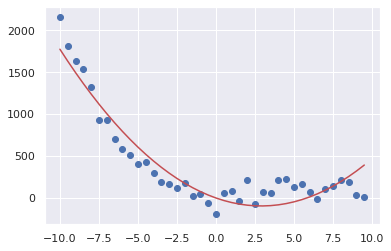

In [88]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_ploty, y)

y_pred = regressor_poly.predict(X_ploty)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c='r')

In [89]:
r2_score(y, y_pred)

0.9000601519884677

### Ekstrakcja cech wielomianowych - stopień 3

In [90]:
np.set_printoptions(suppress=True)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

### Dopasowanie modelu

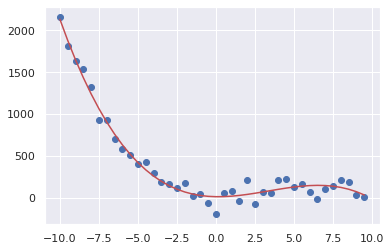

In [91]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly, y)

y_pred = regressor_poly_3.predict(X_poly)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c='r')

In [92]:
r2_score(y, y_pred)

0.9793138557357745

### 5. E. REGRESJA: logistyczna

### Import bibliotek

In [93]:
import sklearn
sklearn.__version__

'0.22.2.post1'


Jest to liniowy model do zadań klasyfikacyjnych. Inna nazwa Logit Regression. 

#### Przykłady zastosowań:
- przewidywanie czy mail jest spamem, czy też nie
- przewidywanie czy użytkownik kliknie w reklamę
- przewidywanie czy nowotwór jest złośliwy czy też nie
- przewidywanie czy dłużnik spłaci wierzycielowi dług, czy też zajdzie zdarzenie default
- przewidywanie czy transakcja jest próbą oszustwa

Przy budowie modelu regresji logistycznej wykorzystamy funkcję sigmoid. Definiuje się ją wzorem:
$$sigmoid(x) = \frac{1}{1+e^{-x}}$$

Text(0.5, 1.0, 'Sigmoid Function')

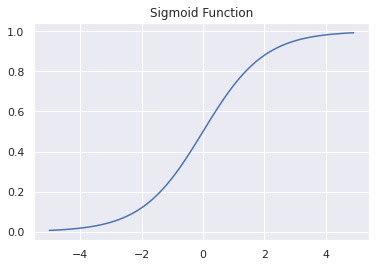

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

sns.set()
np.random.seed(10)
np.set_printoptions(precision=6, suppress=True)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-5, 5, 0.1)
y = sigmoid(X)
plt.plot(X, y)
plt.title('Sigmoid Function')

Następnie rozważmy model liniowy $Y = w_0 + w_1X_1$. Podstawiając to do funkcji sigmoid otrzymujemy:
$$LOG\_REG(Y) = \frac{1}{1 + e^{-(w_0 + w_1X_1)}}$$
Dzięki temu przekształceniu regresja logistyczna zwraca nam wartości z przedziału $(0, 1)$ co możemy interpretować jako prawdopodobieństwo i na podstawie tych prawdopodobieństw przewidywać poszczególne klasy.

### Załadowanie danych

Dane te dotyczą raka piersi i znajdują sie w bibliotece sklearn

In [95]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data)

{'data': array([[ 17.99   ,  10.38   , 122.8    , ...,   0.2654 ,   0.4601 ,
          0.1189 ],
       [ 20.57   ,  17.77   , 132.9    , ...,   0.186  ,   0.275  ,
          0.08902],
       [ 19.69   ,  21.25   , 130.     , ...,   0.243  ,   0.3613 ,
          0.08758],
       ...,
       [ 16.6    ,  28.08   , 108.3    , ...,   0.1418 ,   0.2218 ,
          0.0782 ],
       [ 20.6    ,  29.33   , 140.1    , ...,   0.265  ,   0.4087 ,
          0.124  ],
       [  7.76   ,  24.54   ,  47.92   , ...,   0.     ,   0.2871 ,
          0.07039]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

Powyżej - nazwy klas: 'malignant', 'benign' - czyli nowotwór złośliwy i łagodny

Wyodrębnienie ze zmiennej data danych oraz zmiennej docelowej i przypisanie ich do zmiennej x i y

Chcemy na podstawie 30 atrybutów przewidzieć klasę docelową, czy nowotwór jest złosliwy, czy łagodny. Zmienna x zawiera wszystkie dane

In [96]:
X = data.data
y = data.target

print(f'shape X: {X.shape}')
print(f'shape y: {y.shape}')

shape X: (569, 30)
shape y: (569,)


In [97]:
df = pd.DataFrame(data=X, columns=data.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [98]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Podział danych na zbiór treningowy i testowy

WYNIK: 426 próbek w zbiorze tesyowym, 143 próbki w zbiorze testowym

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


### Dopasowanie modelu

Metoda fit() - dzięki niej przetrenowanie na naszym zbiorze danych - treningowym

In [101]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predykcja na podstawie modelu

Przewidujemy prawdopodobieństwo przynależności do konkretnej klasy - klasy 0 i 1

In [102]:
y_prob = classifier.predict_proba(X_test)
y_prob

array([[0.992375, 0.007625],
       [0.00011 , 0.99989 ],
       [0.003109, 0.996891],
       [0.999754, 0.000246],
       [0.003724, 0.996276],
       [0.01108 , 0.98892 ],
       [0.000276, 0.999724],
       [0.938288, 0.061712],
       [1.      , 0.      ],
       [0.986074, 0.013926],
       [0.000113, 0.999887],
       [0.000342, 0.999658],
       [0.548647, 0.451353],
       [0.001143, 0.998857],
       [0.999714, 0.000286],
       [0.999   , 0.001   ],
       [0.000877, 0.999123],
       [0.088147, 0.911853],
       [0.023621, 0.976379],
       [0.998134, 0.001866],
       [0.650522, 0.349478],
       [0.193754, 0.806246],
       [0.00397 , 0.99603 ],
       [0.076756, 0.923244],
       [1.      , 0.      ],
       [1.      , 0.      ],
       [0.096208, 0.903792],
       [1.      , 0.      ],
       [0.001316, 0.998684],
       [0.019507, 0.980493],
       [0.001466, 0.998534],
       [0.007387, 0.992613],
       [1.      , 0.      ],
       [0.00098 , 0.99902 ],
       [0.0314

In [103]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

### Ocena modelu

48 poprawnie przewidzianych klas, które były klasami 0, popełnione zostały 4 błędy; 85 razy poprawnie przewidzawidzieliśmy klasę pierwszą, 6 błędów

Accuracy: 0.9300699300699301


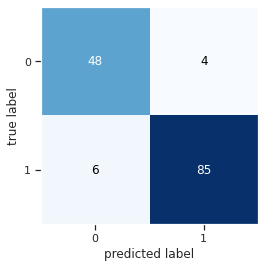

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
sns.set()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

In [105]:
def plot_confusion_matrix(cm):
    # Binary classification
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title=f'Confusion Matrix, Accuracy: {acc:.4f}', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

Wykrywanie n. łagodnego (bening) z więksża precyzją

In [106]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.89      0.92      0.91        52
      benign       0.96      0.93      0.94        91

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143

